In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path=r'C:\Users\SHRI\Documents\DS\EDA\Visadataset.csv'
visadf=pd.read_csv(file_path)
visadf

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [11]:
cat=visadf.select_dtypes(include='object').columns
num=visadf.select_dtypes(exclude='object').columns

In [6]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [12]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [8]:
visadf['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

- There are total 25480 applicants are there

- In that 25480  applicants 17018 applicamnts are got the visa

- 8462 applicants did not get the visa

- Also there are 16861 applicants are applied for the visa from asia

- We want to know how many applicants from asia got certified

- And how many applicants fron asia got denied

In [9]:
# step 1 select the continent data
# step2 continent data == asia it is con1
# step3 select the case status data
# step4 case status data == certified is con2
# step5 cond = con1 & con2
# step6 apply main df on can get the len

In [9]:
c1=visadf['continent'].value_counts()

In [10]:
con1=visadf['continent']=='Asia'
con2=visadf['case_status']=='Certified'
cond=con1 & con2
len(visadf[cond])

11012

In [11]:
cond=con1 & con2
len(visadf[cond])

11012

In [12]:
## from different continents how many ppl are certified
lables=visadf['continent'].unique()

for i in lables:
    con1=visadf['continent']==i
    con2=visadf['case_status']=='Certified'
    cert_con=con1 & con2
    print(len(visadf[cert_con]))

11012
397
2037
2957
493
122


In [13]:
lables=visadf['continent'].unique()
cert_count=[]
den_count=[]

for i in lables:
    con1=visadf['continent']==i
    con2=visadf['case_status']=='Certified'
    con3=visadf['case_status']=='Denied'
    cert_con=con1 & con2
    den_con= con1 & con3
    cert_count.append(len(visadf[cert_con]))
    den_count.append(len(visadf[den_con]))

    print(cert_count)
    print(den_count)

[11012]
[5849]
[11012, 397]
[5849, 154]
[11012, 397, 2037]
[5849, 154, 1255]
[11012, 397, 2037, 2957]
[5849, 154, 1255, 775]
[11012, 397, 2037, 2957, 493]
[5849, 154, 1255, 775, 359]
[11012, 397, 2037, 2957, 493, 122]
[5849, 154, 1255, 775, 359, 70]


In [14]:
lables=visadf['continent'].unique()
cert_count=[]
den_count=[]

for i in lables:
    con1=visadf['continent']==i
    con2=visadf['case_status']=='Certified'
    con3=visadf['case_status']=='Denied'
    cert_con=con1 & con2
    den_con= con1 & con3
    cert_count.append(len(visadf[cert_con]))
    den_count.append(len(visadf[den_con]))

    # print(cert_count)
    # print(den_count)
cols=sorted(visadf['case_status'].unique())
print(cols)

pd.DataFrame(zip(cert_count,den_count),
             columns=cols,index=lables)

['Certified', 'Denied']


,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**Short Cut Method**
$use cross tab$

In [15]:
#pd.crosstab(<INDEX>,<COLUMNS>)

con1=visadf['continent']
con2=visadf['case_status']
pd.crosstab(con1,con2)

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [16]:
con1=visadf['continent']
con2=visadf['case_status']
pd.crosstab(con2,con1)

continent,Africa,Asia,Europe,North America,Oceania,South America
case_status,,,,,,
Certified,397,11012,2957,2037,122,493
Denied,154,5849,775,1255,70,359


In [17]:
## to display in graph

con1=visadf['continent']
con2=visadf['case_status']
r1=pd.crosstab(con1,con2)
r1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

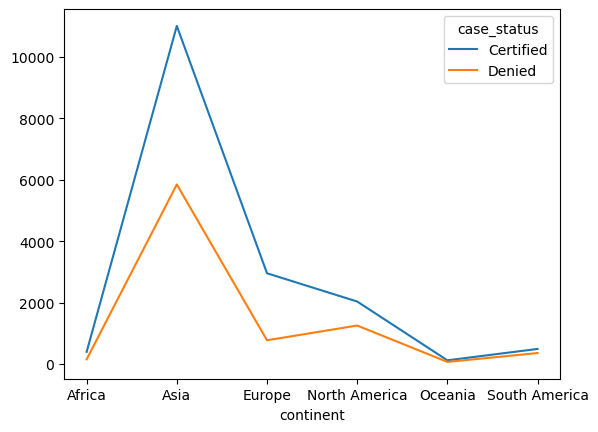

In [18]:
r1.plot()

<Axes: xlabel='continent'>

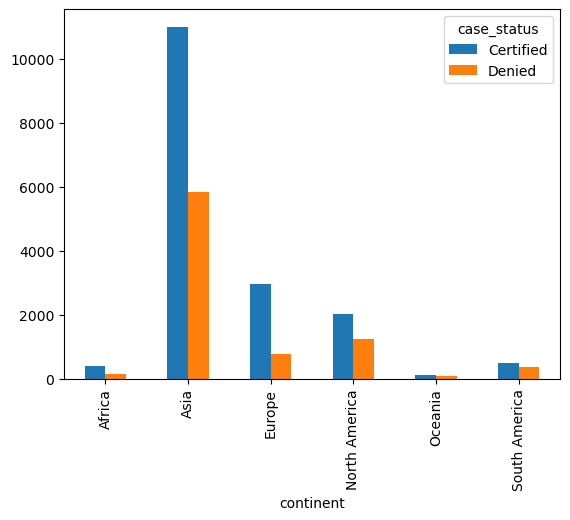

In [20]:
## plot it in bar graph
r1.plot(kind='bar')

**case_status-continent-education_of_employee**

In [44]:
# from asia there 16k application applied for visa
#             IN that 11k ppl got certified
#              In that 11k ppl different educatiuon applicants are available

# we want those information

In [21]:
#pd.crosstab(index,columns)

col1=visadf['continent']
col2=visadf['case_status']
col3=visadf['education_of_employee']

cols=[col1, col2]
pd.crosstab(col3,cols)

continent                Africa             Asia           Europe         \
case_status           Certified Denied Certified Denied Certified Denied   
education_of_employee                                                      
Bachelor's                   81     62      4407   2761      1040    259   
Doctorate                    43     11       780    143       788     58   
High School                  23     43       676   1614       162    328   
Master's                    250     38      5149   1331       967    130   

continent             North America          Oceania        South America  \
case_status               Certified Denied Certified Denied     Certified   
education_of_employee                                                       
Bachelor's                      641    584        38     28           160   
Doctorate                       207     51        19      3            75   
High School                     210    191        19     17            74   
Master's                        979    429        46     22           184   

continent                     
case_status           Denied  
education_of_employee         
Bachelor's               173  
Doctorate                 14  
High School               63  
Master's                 109

In [22]:

col1=visadf['continent']
col2=visadf['case_status']
col3=visadf['education_of_employee']

cols=[col2,col3]
pd.crosstab(col1,cols)

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

<Axes: xlabel='continent'>

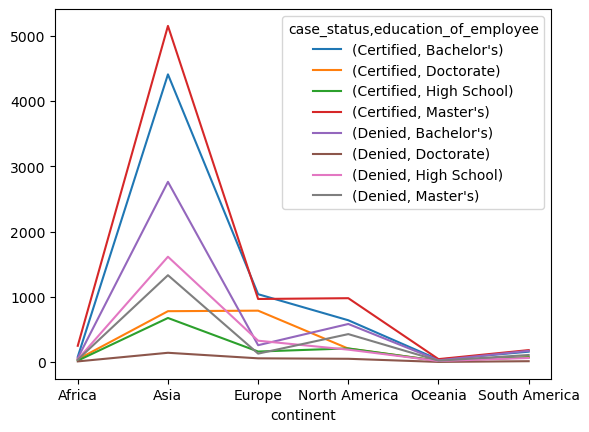

In [24]:
r2=pd.crosstab(col1,cols)
r2.plot()

<Axes: xlabel='continent'>

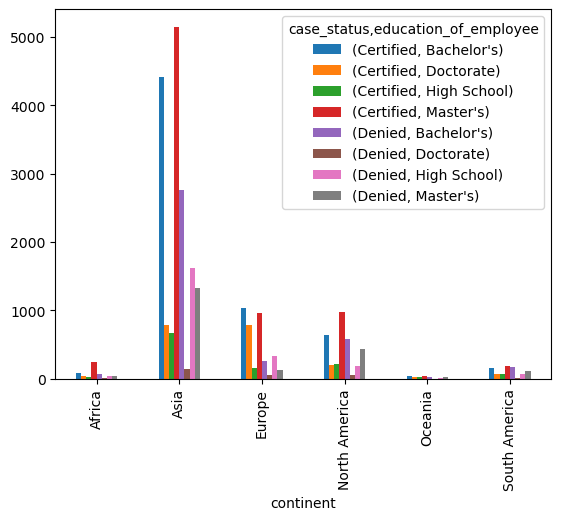

In [25]:
r2=pd.crosstab(col1,cols)
r2.plot(kind='bar')

<Axes: xlabel='continent'>

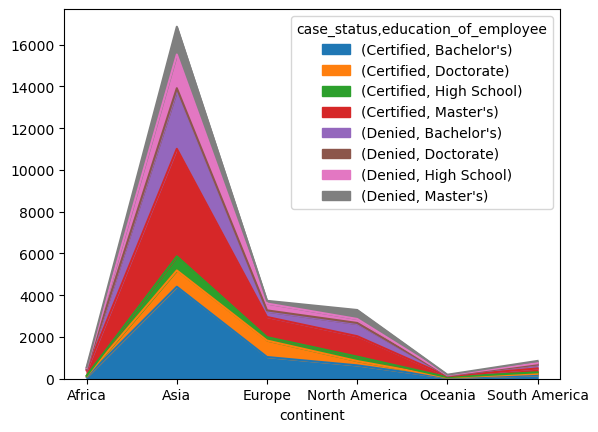

In [26]:
r2=pd.crosstab(col1,cols)
r2.plot(kind='area')

<Axes: ylabel='Density'>

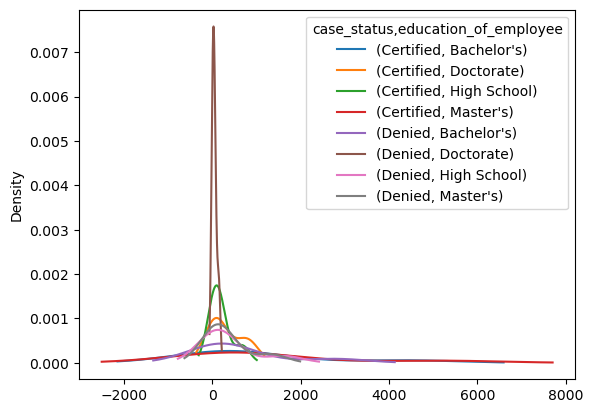

In [27]:
r2=pd.crosstab(col1,cols)
r2.plot(kind='kde')

In [28]:
r2=pd.crosstab(col1,cols)
r2.plot(kind='scatter')

ValueError: scatter requires an x and y column

## group by

In [29]:
visadf['education_of_employee'].value_counts()

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

In [30]:
visadf['prevailing_wage']

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [31]:
visadf.groupby('education_of_employee')

In [32]:
list(visadf.groupby('education_of_employee'))

[("Bachelor's",
           case_id      continent education_of_employee has_job_experience  \
  2         EZYV03           Asia            Bachelor's                  N   
  3         EZYV04           Asia            Bachelor's                  N   
  6         EZYV07           Asia            Bachelor's                  N   
  7         EZYV08  North America            Bachelor's                  Y   
  8         EZYV09           Asia            Bachelor's                  N   
  ...          ...            ...                   ...                ...   
  25466  EZYV25467         Europe            Bachelor's                  Y   
  25468  EZYV25469           Asia            Bachelor's                  N   
  25473  EZYV25474           Asia            Bachelor's                  Y   
  25475  EZYV25476           Asia            Bachelor's                  Y   
  25479  EZYV25480           Asia            Bachelor's                  Y   
  
        requires_job_training  no_of_employee

In [33]:
visadf.groupby('education_of_employee').count()

,case_id,continent,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
education_of_employee,,,,,,,,,,,
Bachelor's,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234
Doctorate,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192
High School,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420
Master's,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634


In [62]:
## here we got exactly value count only

visadf.groupby('education_of_employee').size()

education_of_employee
Bachelor's     10234
Doctorate       2192
High School     3420
Master's        9634
dtype: int64

In [34]:
## Based on group by select another column
## select the perticular column
visadf.groupby('education_of_employee')['prevailing_wage']

In [35]:
list(visadf.groupby('education_of_employee')['prevailing_wage'])

[("Bachelor's",
  2        122996.8600
  3         83434.0300
  6         53635.3900
  7           418.2298
  8         74362.1900
              ...     
  25466      6973.4000
  25468    272715.7400
  25473     22845.5600
  25475     77092.5700
  25479     70876.9100
  Name: prevailing_wage, Length: 10234, dtype: float64),
 ('Doctorate',
  9         67514.76
  19        79948.12
  24        71286.04
  31       135866.13
  42        43630.58
             ...    
  25407     62327.54
  25426      7058.51
  25428     70380.93
  25448     86894.10
  25474     51104.78
  Name: prevailing_wage, Length: 2192, dtype: float64),
 ('High School',
  0           592.2029
  11        70813.0900
  15        74108.0200
  23        90108.3800
  27       103029.3300
              ...     
  25463    213189.3600
  25465       481.2238
  25471     75587.4200
  25472     76155.6000
  25476    279174.7900
  Name: prevailing_wage, Length: 3420, dtype: float64),
 ("Master's",
  1         83425.6500
  4      

In [36]:
visadf['prevailing_wage'].mean()

## mean wage of all 25480 obervations
## Bachlors , Doctors, Hs , Masters

np.float64(74455.81459209183)

In [ ]:
visadf[visadf.groupby['education_of_employee']=="Bachelor's"['prevailing_wage'].mean()]  ## check it first

In [40]:
visadf.groupby('education_of_employee')['prevailing_wage'].mean()

education_of_employee
Bachelor's     73405.443735
Doctorate      64561.076657
High School    71582.147756
Master's       78843.057843
Name: prevailing_wage, dtype: float64

In [41]:
con=visadf['case_status']=='Certified'
new_df=visadf[con]

new_df.groupby('continent').size()

continent
Africa             397
Asia             11012
Europe            2957
North America     2037
Oceania            122
South America      493
dtype: int64

In [42]:
## i want to know min wage of the Asia ppl

visadf['prevailing_wage'].min()  ##25480
con=visadf['continent']=='Asia'
new_df=visadf[con]
new_df['prevailing_wage'].min()

3.3188

In [43]:
visadf.groupby('continent')['prevailing_wage'].min()

continent
Africa           32.9286
Asia              3.3188
Europe            9.1753
North America     2.1367
Oceania          24.4888
South America     3.0031
Name: prevailing_wage, dtype: float64

- We have seen two variables Continent and case status

- we have seen three variables Continent and case status and Education of employees

- We also done similar analysis using group by

- Only categorical analysis completed

- Alsi Bi variate and multi variate analysis also completed

- Now we need to perfor Two numerical columns analysis

    - This will give relation between two columns which are numerical in naturte

    - So we can perform **correlation matrix** to get the relationship

    - Also we need to perform **scatter plots** to visualize the relation

## Scatter Plot

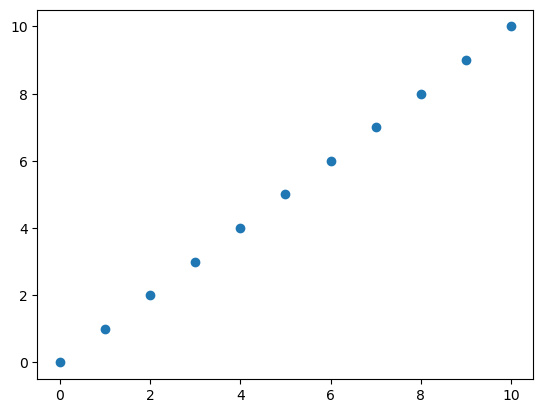

In [45]:
x=range(0,11)
y=range(0,11)
plt.scatter(x,y)

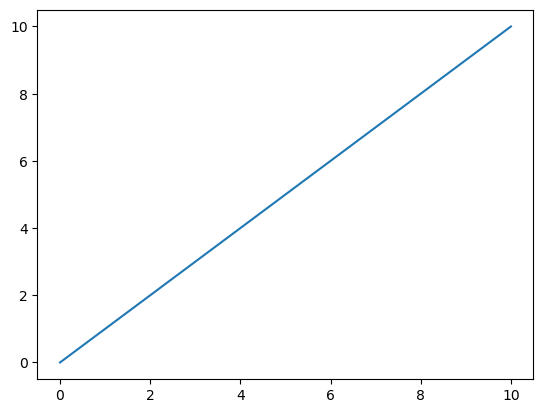

In [46]:
plt.plot(x,y)

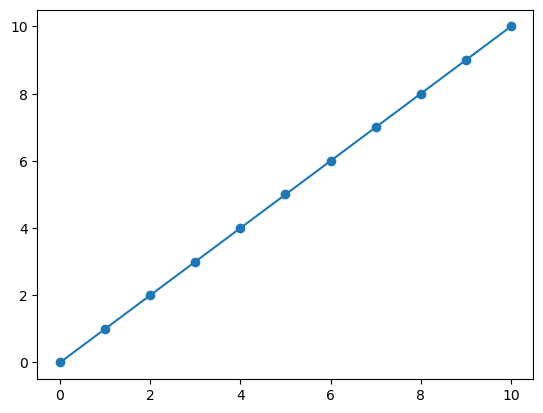

In [52]:
x=range(0,11)
y=range(0,11)
plt.scatter(x,y)
plt.plot(x,y)

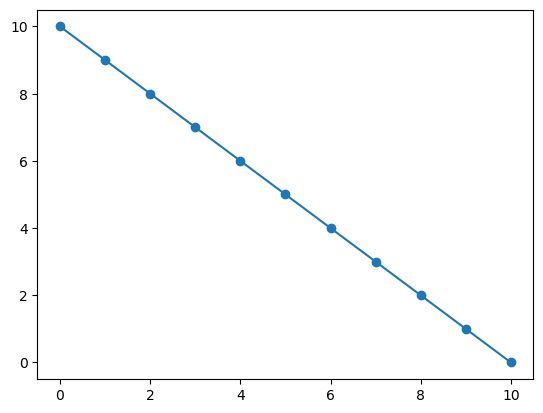

In [51]:
x=range(0,11)  ## 0 to 10
y=range(10,-1,-1)   ## 10 to -1+1=0
plt.scatter(x,y)
plt.plot(x,y)

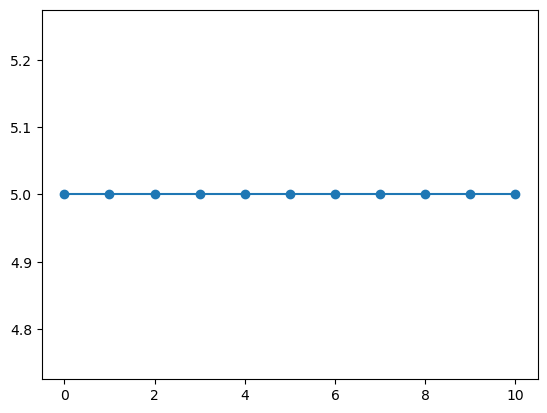

In [55]:
x=range(0,11)
y= [5 for i in range(0,11)]   ## take 5 value 
plt.scatter(x,y)
plt.plot(x,y)

In [56]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [57]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [59]:
visadf.corr()
## could not convert string to float: 'EZYV01'


ValueError: could not convert string to float: 'EZYV01'

In [61]:
visadf.corr(numeric_only= True,)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


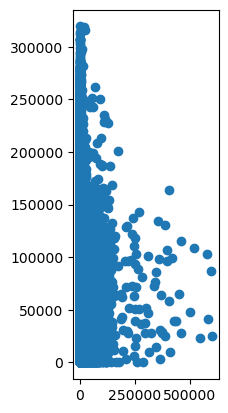

In [64]:
col1=visadf['no_of_employees']
col2=visadf['yr_of_estab']
col3=visadf['prevailing_wage']
plt.subplot(1,3,1).scatter(col1,col3)

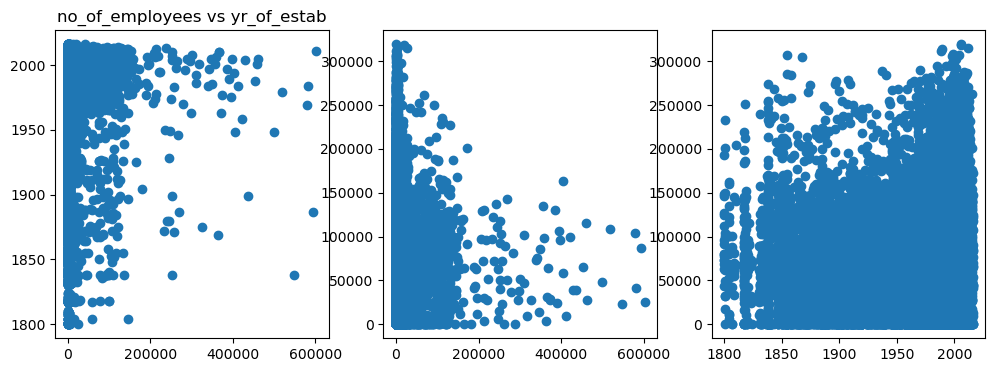

In [65]:
col1=visadf['no_of_employees']
col2=visadf['yr_of_estab']
col3=visadf['prevailing_wage']
plt.figure(figsize=(12,4))
plt.subplot(1,3,1).scatter(col1,col2)
plt.title('no_of_employees vs yr_of_estab')
plt.subplot(1,3,2).scatter(col1,col3)
plt.subplot(1,3,3).scatter(col2,col3)

In [66]:
## winequality data set 
## load 

In [67]:
file_path=r'C:\Users\SHRI\Documents\DS\Data_files\winequality_red.csv'
wine=pd.read_csv(file_path)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [72]:
wine_data_corr=wine.corr()
wine_data_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [68]:

cat=wine.select_dtypes(include='object').columns
num=wine.select_dtypes(exclude='object').columns

In [69]:
cat

Index([], dtype='object')

In [70]:
num

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<Axes: >

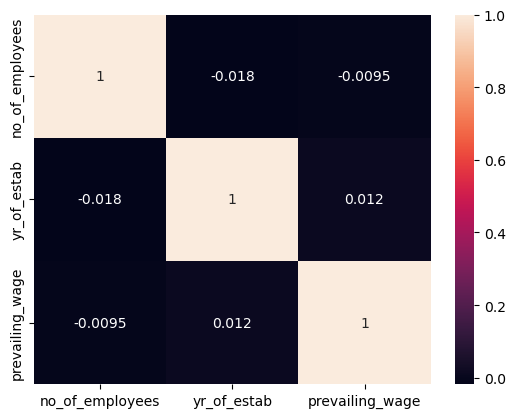

In [73]:
visa_corr=visadf.corr(numeric_only=True)
sns.heatmap(visa_corr,annot=True)

## Heat Map

- Any matrix values can visualize using a heat map

- Heat map willprovide colours for different values

- Heat map also provide colours bar which indicates the colour and its value

- For exampole the values ranges from 0.8 to 1 display as Blue colour

- So we no need to check values, we can directly see the **blue colour**

- So immediately we can sence blue colour means highest value which is 0.8 to 1

- Heat map available in **sea born**

<Axes: >

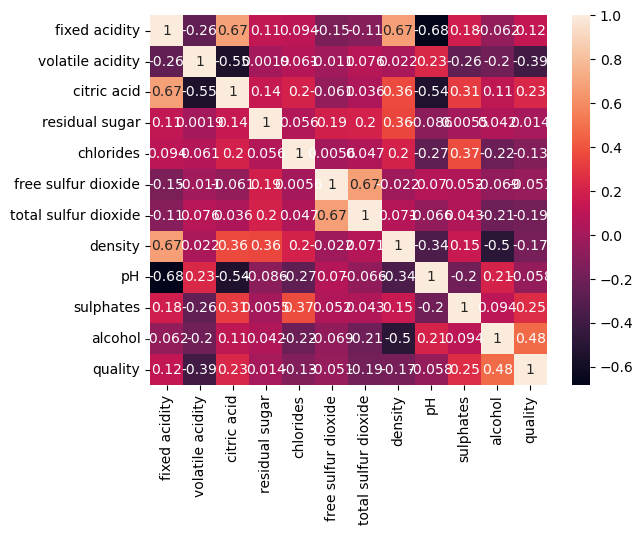

In [74]:
wine_data_corr=wine.corr(numeric_only=True)
sns.heatmap(wine_data_corr,annot=True)

In [81]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

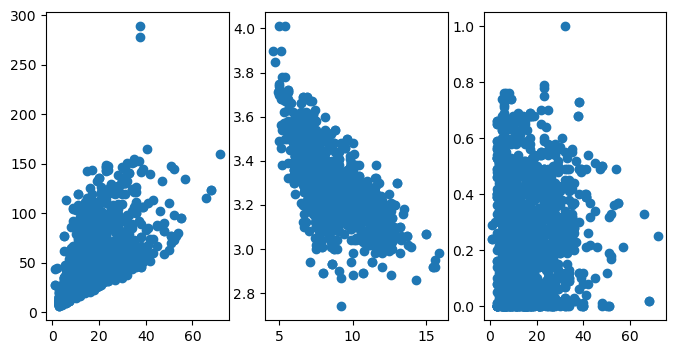

In [86]:
col1=wine['free sulfur dioxide']
col2=wine['total sulfur dioxide']
col3=wine['fixed acidity']
col4=wine['pH']
col5=wine['citric acid']
plt.figure(figsize=(8,4))
plt.subplot(1,3,1).scatter(col1,col2)
plt.subplot(1,3,2).scatter(col3,col4)
plt.subplot(1,3,3).scatter(col1,col5)